In [12]:
!pip install --upgrade mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.7 MB/s eta 0:00:00


C:\Users\Hi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Frequent Itemsets:
     support               itemsets
0       1.0                (bread)
1       0.6                 (milk)
2       0.6               (butter)
3       0.6                 (eggs)
4       0.6          (milk, bread)
5       0.6        (bread, butter)
6       0.4         (milk, butter)
7       0.4  (milk, bread, butter)
8       0.6          (bread, eggs)
9       0.4           (milk, eggs)
10      0.4    (milk, bread, eggs)

Association Rules:
         antecedents      consequents  support  confidence      lift
0            (milk)          (bread)      0.6    1.000000  1.000000
1           (bread)           (milk)      0.6    0.600000  1.000000
2           (bread)         (butter)      0.6    0.600000  1.000000
3          (butter)          (bread)      0.6    1.000000  1.000000
4            (milk)         (butter)      0.4    0.666667  1.111111
5          (butter)           (milk)      0.4    0.666667  1.111111
6     (milk, bread)         (butter)      0.4    0.666667  1.11

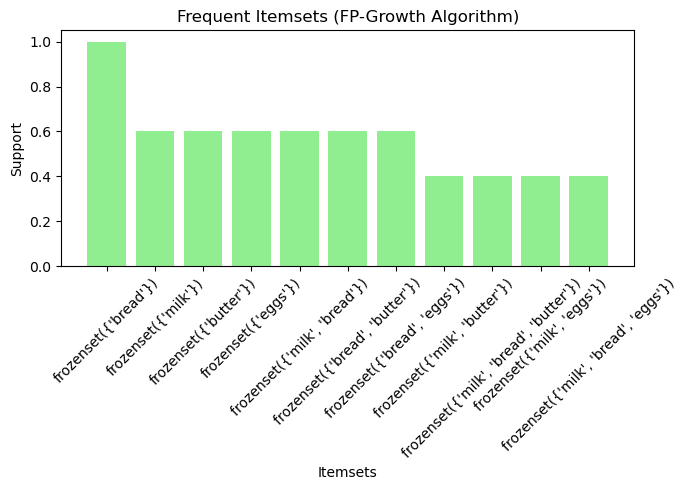

In [13]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt
dataset = [
 ['milk', 'bread', 'butter'],
 ['bread', 'eggs', 'jam'],
 ['milk', 'bread', 'eggs', 'butter'],
 ['milk', 'bread', 'eggs'],
 ['bread', 'butter']
]
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_items = fpgrowth(df, min_support=0.4, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
print("Frequent Itemsets:\n", frequent_items)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
frequent_items = frequent_items.sort_values(by="support", ascending=False)
plt.figure(figsize=(7,5))
plt.bar([str(itemset) for itemset in frequent_items['itemsets']], frequent_items['support'], color='lightgreen')
plt.title("Frequent Itemsets (FP-Growth Algorithm)")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()